# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

In [3]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [4]:
x_train = train['X'] / 255
y_train = train['y']
x_test = test['X'] / 255
y_test = test['y']

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [6]:
import numpy as np

x_train = np.transpose(x_train, (3,0,1,2))
x_test = np.transpose(x_test, (3,0,1,2))


In [9]:
# Converting number 10 to 0 
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


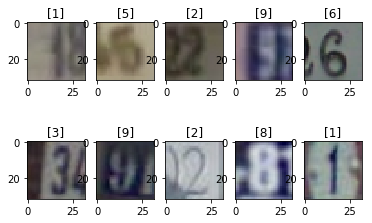

In [18]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(5,5))

%matplotlib inline


num_test_images = x_train.shape[0]

random_inx = np.random.choice(num_test_images, 10)
random_images = x_train[random_inx, ...]
random_labels = y_train[random_inx, ...]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i])
    plt.title(random_labels[i])

In [12]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [20]:
train_gs = rgb2gray(x_train).astype(np.float32)
test_gs = rgb2gray(x_test).astype(np.float32)
train_gs.shape

(73257, 32, 32, 1)

In [23]:
random_images = train_gs[random_inx, ...]
random_images.shape

(10, 32, 32, 1)

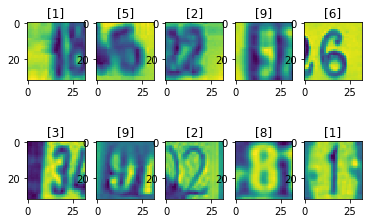

In [30]:
random_images = train_gs[random_inx, ...]
random_labels = y_train[random_inx, ...]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i,:,:,0])
    plt.title(random_labels[i])

In [31]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(y_train)
y_train_oh = enc.transform(y_train).toarray()
y_test_oh = enc.transform(y_test).toarray()

In [32]:
y_test_oh[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [78]:
y_test

array([[5],
       [2],
       [1],
       ...,
       [7],
       [6],
       [7]], dtype=uint8)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, BatchNormalization

In [61]:
model = Sequential([
    Flatten(input_shape=train_gs[0].shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total params: 140,666
Trainable params: 140,666
Non-trainable params: 0
_________________________________________________________________


In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = 'mlp_checkpoints', save_best_only=True, save_weights_only=True, monitor='val_loss', verbose=1)
earlystop = EarlyStopping(patience=5, monitor='loss')

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [65]:
history = model.fit(train_gs, y_train_oh, callbacks=[checkpoint, earlystop], batch_size=128, validation_split=0.15, epochs=30)

Train on 62268 samples, validate on 10989 samples
Epoch 1/30
61824/62268 [============================>.] - ETA: 0s - loss: 2.2164 - acc: 0.1930
Epoch 00001: val_loss improved from inf to 2.08266, saving model to mlp_checkpoints
62268/62268 [==============================] - 13s 206us/sample - loss: 2.2158 - acc: 0.1933 - val_loss: 2.0827 - val_acc: 0.2569
Epoch 2/30
61824/62268 [============================>.] - ETA: 0s - loss: 1.7028 - acc: 0.4056
Epoch 00002: val_loss improved from 2.08266 to 1.47808, saving model to mlp_checkpoints
62268/62268 [==============================] - 12s 191us/sample - loss: 1.7013 - acc: 0.4064 - val_loss: 1.4781 - val_acc: 0.5000
Epoch 3/30
62208/62268 [============================>.] - ETA: 0s - loss: 1.3802 - acc: 0.5408
Epoch 00003: val_loss improved from 1.47808 to 1.29950, saving model to mlp_checkpoints
62268/62268 [==============================] - 12s 191us/sample - loss: 1.3802 - acc: 0.5408 - val_loss: 1.2995 - val_acc: 0.5816
Epoch 4/30
6220

Text(0.5, 1.0, 'Loss')

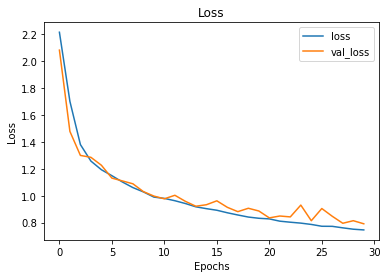

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

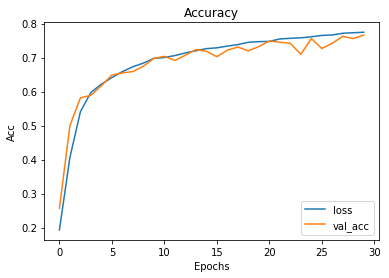

In [67]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['loss','val_acc'], loc='lower right')
plt.title("Accuracy")

In [68]:
test_loss, test_accuracy = model.evaluate(test_gs, y_test_oh, verbose=2)

26032/1 - 3s - loss: 0.7973 - acc: 0.7425


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [54]:
checkpoint = ModelCheckpoint(filepath = 'model_checkpoints', save_best_only=True, save_weights_only=True, monitor='val_loss', verbose=1)
earlystop = EarlyStopping(patience=5, monitor='loss')

In [44]:
 model_cnn = Sequential([
        Conv2D(filters=32, input_shape=train_gs[0].shape, kernel_size=(2, 2), 
               activation='relu'),
        MaxPool2D(pool_size= (2,2)),
        Conv2D(filters=16, kernel_size=(2, 2), activation='relu'),
        MaxPool2D(pool_size= (2,2)),
        Conv2D(filters=8, kernel_size=(2, 2), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=10, activation='softmax')
    ])

In [45]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 31, 31, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 8)           520       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 8)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 3, 8)          

In [46]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [47]:
history_cnn = model_cnn.fit(train_gs, y_train_oh, callbacks=[checkpoint, earlystop], batch_size=128, validation_split=0.15, epochs=8)

Train on 62268 samples, validate on 10989 samples
Epoch 1/8
62208/62268 [============================>.] - ETA: 0s - loss: 1.5713 - acc: 0.4593
Epoch 00001: val_loss did not improve from 0.75925
62268/62268 [==============================] - 159s 3ms/sample - loss: 1.5710 - acc: 0.4594 - val_loss: 1.3552 - val_acc: 0.5459
Epoch 2/8
62208/62268 [============================>.] - ETA: 0s - loss: 0.9241 - acc: 0.7069
Epoch 00002: val_loss did not improve from 0.75925
62268/62268 [==============================] - 156s 3ms/sample - loss: 0.9242 - acc: 0.7069 - val_loss: 1.1738 - val_acc: 0.6198
Epoch 3/8
62208/62268 [============================>.] - ETA: 0s - loss: 0.8119 - acc: 0.7454
Epoch 00003: val_loss did not improve from 0.75925
62268/62268 [==============================] - 162s 3ms/sample - loss: 0.8117 - acc: 0.7455 - val_loss: 0.8153 - val_acc: 0.7437
Epoch 4/8
62208/62268 [============================>.] - ETA: 0s - loss: 0.7508 - acc: 0.7654
Epoch 00004: val_loss did not impr

Text(0.5, 1.0, 'Loss')

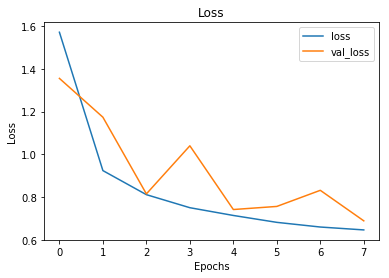

In [50]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

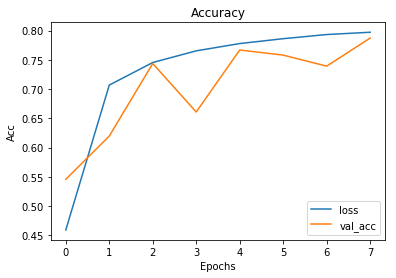

In [51]:
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['loss','val_acc'], loc='lower right')
plt.title("Accuracy")

In [52]:
test_loss, test_accuracy = model_cnn.evaluate(test_gs, y_test_oh, verbose=2)

26032/1 - 22s - loss: 0.6889 - acc: 0.7838


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [69]:
model.load_weights('mlp_checkpoints')

In [56]:
model_cnn.load_weights('model_checkpoints')

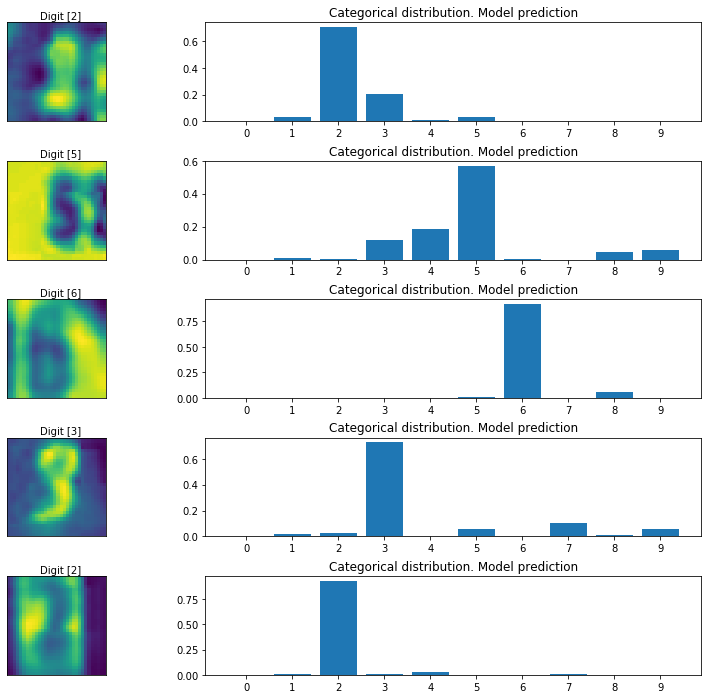

In [83]:
num_test_images = test_gs.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = test_gs[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(0,10), prediction)
    axes[i, 1].set_xticks(np.arange(0,10))
    axes[i, 1].set_title("Categorical distribution. Model prediction")
    
plt.show()

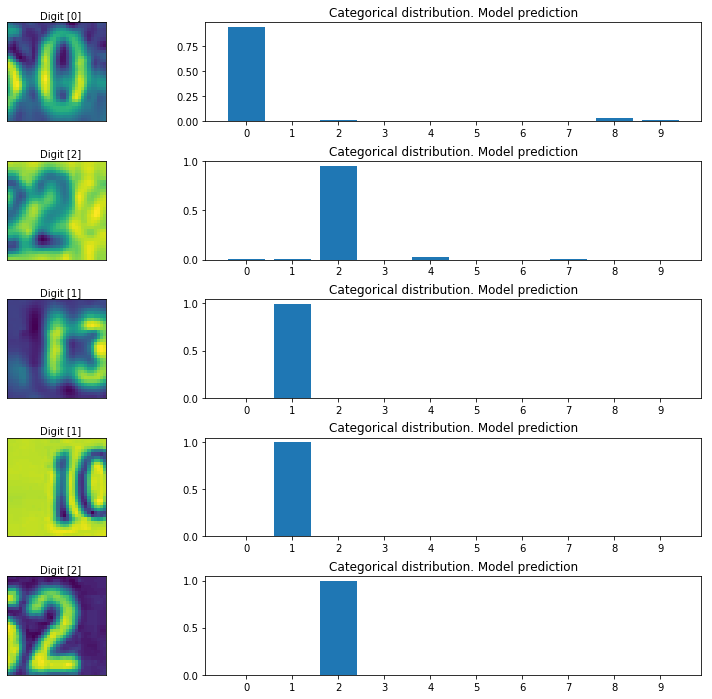

In [82]:
num_test_images = test_gs.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = test_gs[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(0,10), prediction)
    axes[i, 1].set_xticks(np.arange(0,10))
    axes[i, 1].set_title("Categorical distribution. Model prediction")
    
plt.show()